TAREAS DE LIMPIEZA DE DATOS
1. **Cambiar las abreviaturas -> ejem: "u"->you "ur->"your"**
2. Buscar  caracteres Nulls y Remplazar con valor "0" (El cero debe ser valor String). Igual queda en Duda y se debria preguntar al tutor y o demas compa;eros
3. Buscar las palabras con mayor frecuencia y hacer un grafica o Datavisualitation.
4. **Quitar stopwords ejem: the, and, that, a, any, an, be, with...**
5. eliminar emojis, URL, hashtags, contracciones.

In [1]:
import pandas as pd
import numpy as np
import string

In [2]:
df = pd.read_csv('prueba.csv', delimiter = ';', names = ['Conversation_Id', 'Authors', 'Class', 'Conversation' ])

In [3]:
df_conv = df['Conversation'].dropna()

Reemplazar | por un espacio ya que solo consideraremos las palabras presentes más no las secuencias de palabras

In [4]:
df_conv = df_conv.apply(lambda x: x.replace('|', ' '))

Eliminar puntuación

In [5]:
df_conv = df_conv.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

Convertir números a palabras

In [6]:
from num2words import num2words
df_conv = df_conv.apply(lambda x: ' '.join([num2words(word) if word.isnumeric() and int(word)<1000000000 else word for message in x.split('|') for word in message.split(' ')]))

Reemplazar doble espacio con uno solo

In [7]:
df_conv = df_conv.apply(lambda x: ' '.join([word.lower() for word in x.split(' ') if word]))

Eliminar abreviaciones del texto

In [8]:
abbr_dict={
    "u": "you",
    "ur": "your",
    "what's":"what is",
    "what're":"what are",
    "who's":"who is",
    "who're":"who are",
    "where's":"where is",
    "where're":"where are",
    "when's":"when is",
    "when're":"when are",
    "how's":"how is",
    "how're":"how are",
    "whats":"what is",
    "whatre":"what are",
    "whos":"who is",
    "whore":"who are",
    "wheres":"where is",
    "wherere":"where are",
    "whens":"when is",
    "whenre":"when are",
    "hows":"how is",
    "howre":"how are",

    "i'm":"i am",
    "we're":"we are",
    "you're":"you are",
    "they're":"they are",
    "it's":"it is",
    "he's":"he is",
    "she's":"she is",
    "that's":"that is",
    "there's":"there is",
    "there're":"there are",
    "im":"i am",
    #"were":"we are",
    "youre":"you are",
    "theyre":"they are",
    "hes":"he is",
    "shes":"she is",
    "thats":"that is",
    "theres":"there is",
    "therere":"there are",

    "i've":"i have",
    "we've":"we have",
    "you've":"you have",
    "they've":"they have",
    "who've":"who have",
    "would've":"would have",
    "not've":"not have",
    "ive":"i have",
    "weve":"we have",
    "youve":"you have",
    "theyve":"they have",
    "whove":"who have",
    "wouldve":"would have",
    "notve":"not have",

    "i'll":"i will",
    "we'll":"we will",
    "you'll":"you will",
    "he'll":"he will",
    "she'll":"she will",
    "it'll":"it will",
    "they'll":"they will",
    "ill":"i will",
    #"well":"we will",
    "youll":"you will",
    "hell":"he will",
    "shell":"she will",
    "itll":"it will",
    "theyll":"they will",

    "isn't":"is not",
    "wasn't":"was not",
    "aren't":"are not",
    "weren't":"were not",
    "can't":"can not",
    "couldn't":"could not",
    "don't":"do not",
    "didn't":"did not",
    "shouldn't":"should not",
    "wouldn't":"would not",
    "doesn't":"does not",
    "haven't":"have not",
    "hasn't":"has not",
    "hadn't":"had not",
    "won't":"will not",
    "isnt":"is not",
    "wasnt":"was not",
    "arent":"are not",
    "werent":"were not",
    "cant":"can not",
    "couldnt":"could not",
    "dont":"do not",
    "didnt":"did not",
    "shouldnt":"should not",
    "wouldnt":"would not",
    "doesnt":"does not",
    "havent":"have not",
    "hasnt":"has not",
    "hadnt":"had not",
    "wont":"will not",

    "2mrw": "tomorrow",
    "aka": "also known as",
    "asap": "as soon as possible",
    "a/s/l": "age sex location",
    "ayt": "are you there",
    "b4": "before",
    "bbs": "be back soon",
    "bf": "boyfriend",
    "gf": "girlfriend",
    "brb": "be right back",
    "cmb": "call me back",
    "cu l8r": "see you later",
    "cul8r": "see you later",
    "cuz": "because",
    "cos": "because",
    "cwyl": "chat with you later",
    "dm": "direct message",
    "f2f": "face to face",
    "fb": "facebook",
    "ig": "instagram",
    "fyeo": "for your eyes only",
    "fyi": "for your information",
    "diy": "do it yourself",
    "stfu": "shut the fuck up",
    "lmk": "let me know",
    "ily": "ily",
    "yolo": "you only live once",
    "lmfao": "laughing my freaking ass off",
    "nvm": "never mind",
    "ikr": "i know right",
    "ofc": "of course",
    "ttyl": "talk to you later",
    "lol": "laughing out loud",
    "k": "okay",
    "r": "are",
    "n": "and",
    "b": "be",
    "wat": "what",
    "ya": "you",
    "dunno": "do not know",
    "yea": "yeah",
    "ok": "okay",
    "kewl": "cool",
    "nite": "night",
    "yep": "yes"
}

In [9]:
df_conv = df_conv.apply(lambda x: ' '.join([abbr_dict[word] if word in abbr_dict.keys() else word for word in x.split(' ') ]))

Eliminar stopwords

In [10]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df_conv = df_conv.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

Eliminar puntuación de nuevo

In [11]:
df_conv = df_conv.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

Eliminar valores alfanumericos

In [12]:
df_conv = df_conv.apply(lambda x: ' '.join([word for word in x.split(' ') if word.isalpha()]))

Lematización

In [13]:
import nltk
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
df_conv = df_conv.apply(lambda x: ' '.join([wordnet_lemmatizer.lemmatize(word, pos='v') for word in x.split(' ')]))

In [14]:
df['Conversation'] = df_conv

In [15]:
print(df.dropna(inplace=True))

None


In [16]:
from sklearn import model_selection, naive_bayes, svm
x = df['Conversation']
y = df['Class']
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 1)

In [17]:
ytrain.value_counts(normalize = True)

0    0.969887
1    0.030113
Name: Class, dtype: float64

In [18]:
ytest.value_counts(normalize = True)

0    0.969887
1    0.030113
Name: Class, dtype: float64

## Tranformación texto a vectores

In [19]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = TfidfVectorizer()

Xtrain = vectorizer.fit_transform(xtrain)
Xtest = vectorizer.transform(xtest)

#vectorizer.fit(x)
#Xtrain = vectorizer.transform(xtrain)
#Xtest = vectorizer.transform(xtest)

In [64]:
joblib.dump(vectorizer, 'vectorizer.joblib')

['vectorizer.joblib']

In [20]:
len(vectorizer.vocabulary_)

131908

In [21]:
print(len(xtest))

13383


## SVM con kernel lineal

In [22]:
SVM = svm.SVC(C=1, kernel='linear')#, class_weight='balanced')
Trained = SVM.fit(Xtrain,ytrain)
y_pred = SVM.predict(Xtest)

In [23]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, confusion_matrix
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     12980
           1       0.86      0.62      0.72       403

    accuracy                           0.99     13383
   macro avg       0.92      0.81      0.85     13383
weighted avg       0.98      0.99      0.98     13383



In [62]:
import joblib

In [63]:
joblib.dump(Trained, 'modeloOG.joblib')

['modeloOG.joblib']

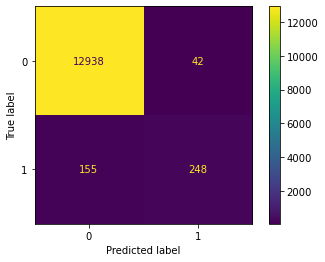

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix
plot_confusion_matrix(Trained, Xtest, ytest)

#### Cros-validation (SVM Lineal)

In [26]:
from sklearn.model_selection import cross_val_score, KFold, cross_validate, StratifiedKFold
kfold = StratifiedKFold(n_splits=10)
scoring = ['f1_macro', 'precision_macro', 'recall_macro']
cv_results = cross_validate(SVM, Xtrain, ytrain, cv=kfold, scoring=scoring)

In [27]:
sorted(cv_results.keys())

['fit_time',
 'score_time',
 'test_f1_macro',
 'test_precision_macro',
 'test_recall_macro']

In [28]:
print("%0.2f F1-score with a standard deviation of %0.2f" % (cv_results['test_f1_macro'].mean(), cv_results['test_f1_macro'].std()))

0.85 F1-score with a standard deviation of 0.01


In [29]:
print("%0.2f precision with a standard deviation of %0.2f" % (cv_results['test_precision_macro'].mean(), cv_results['test_precision_macro'].std()))

0.93 precision with a standard deviation of 0.01


In [30]:
print("%0.2f recall with a standard deviation of %0.2f" % (cv_results['test_recall_macro'].mean(), cv_results['test_recall_macro'].std()))

0.80 recall with a standard deviation of 0.01


## Baseline con DummyClassifier

In [42]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(Xtrain, ytrain)
dummy_pred = dummy_clf.predict(Xtest)
print(classification_report(ytest,dummy_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     12980
           1       0.03      0.04      0.04       403

    accuracy                           0.94     13383
   macro avg       0.50      0.50      0.50     13383
weighted avg       0.94      0.94      0.94     13383



## SVM con kernel RBF

In [43]:
SVM3 = svm.SVC(C=10, kernel='rbf', gamma = 'scale')
Trained2 = SVM3.fit(Xtrain,ytrain)
y_pred3 = SVM3.predict(Xtest)

In [44]:
print(classification_report(ytest,y_pred3))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     12980
           1       0.89      0.61      0.73       403

    accuracy                           0.99     13383
   macro avg       0.94      0.81      0.86     13383
weighted avg       0.99      0.99      0.98     13383



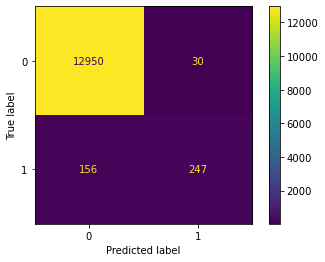

In [45]:
plot_confusion_matrix(Trained2, Xtest, ytest)

In [1]:
cv_results3 = cross_validate(SVM3, Xtrain, ytrain, cv=kfold, scoring=scoring)

NameError: name 'cross_validate' is not defined

In [72]:
sorted(cv_results3.keys())

['fit_time',
 'score_time',
 'test_f1_macro',
 'test_precision_macro',
 'test_recall_macro']

In [73]:
print("%0.2f F1-score with a standard deviation of %0.2f" % (cv_results3['test_f1_macro'].mean(), cv_results3['test_f1_macro'].std()))

0.85 F1-score with a standard deviation of 0.02


In [74]:
print("%0.2f precision with a standard deviation of %0.2f" % (cv_results3['test_precision_macro'].mean(), cv_results3['test_precision_macro'].std()))

0.93 precision with a standard deviation of 0.02


In [75]:
print("%0.2f recall with a standard deviation of %0.2f" % (cv_results3['test_recall_macro'].mean(), cv_results3['test_recall_macro'].std()))

0.80 recall with a standard deviation of 0.02


## Corriendo el modelo con los datos de entrenamiento para analizar overfitting

In [46]:
y_pred4 = SVM3.predict(Xtrain)

In [47]:
print(classification_report(ytrain,y_pred4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     51919
           1       0.99      0.87      0.92      1612

    accuracy                           1.00     53531
   macro avg       0.99      0.93      0.96     53531
weighted avg       1.00      1.00      1.00     53531



## Corriendo el modelo con otro data set

In [48]:
df2 = pd.read_csv('test.csv', delimiter = ';', names = ['Conversation_Id', 'Authors', 'Class', 'Conversation' ])

In [49]:
df_conv2 = df2['Conversation'].dropna()
df_conv2 = df_conv2.apply(lambda x: x.replace('|', ' '))
df_conv2 = df_conv2.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

In [50]:
df_conv2 = df_conv2.apply(lambda x: ' '.join([num2words(word) if word.isnumeric() and int(word)<1000000000 else word for message in x.split('|') for word in message.split(' ')]))

In [51]:
df_conv2 = df_conv2.apply(lambda x: ' '.join([word.lower() for word in x.split(' ') if word]))
df_conv2 = df_conv2.apply(lambda x: ' '.join([abbr_dict[word] if word in abbr_dict.keys() else word for word in x.split(' ') ]))
df_conv2 = df_conv2.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_conv2 = df_conv2.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df_conv2 = df_conv2.apply(lambda x: ' '.join([word for word in x.split(' ') if word.isalpha()]))
df_conv2 = df_conv2.apply(lambda x: ' '.join([wordnet_lemmatizer.lemmatize(word, pos='v') for word in x.split(' ')]))
df2['Conversation'] = df_conv2

In [52]:
print(df2.dropna(inplace=True))

None


In [53]:
x2 = df2['Conversation']
y2 = df2['Class']

In [54]:
Xtest2 = vectorizer.transform(x2)

In [55]:
Xtest2.shape

(155100, 131908)

In [58]:
y_hat = SVM3.predict(Xtest2)

In [59]:
print(classification_report(y2,y_hat))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    151376
         1.0       0.84      0.55      0.67      3724

    accuracy                           0.99    155100
   macro avg       0.91      0.77      0.83    155100
weighted avg       0.99      0.99      0.99    155100



In [60]:
y_hat2 = SVM.predict(Xtest2)

In [61]:
print(classification_report(y2,y_hat2))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    151376
         1.0       0.84      0.57      0.68      3724

    accuracy                           0.99    155100
   macro avg       0.91      0.78      0.84    155100
weighted avg       0.99      0.99      0.99    155100

